# 2. Data Preprocessing

In [1]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

## 2.1. Pre-processing on a single image

In [2]:
test_dir = '..\\data\\Augmentation_excercise\\test'

In [3]:
file_list = os.listdir(test_dir)
file_list[-1]

'image (1).JPG'

In [4]:
img = cv2.imread(os.path.join(test_dir, file_list[-1]))
img.shape

(256, 256, 3)

In [5]:
img[0][0]

array([152, 148, 160], dtype=uint8)

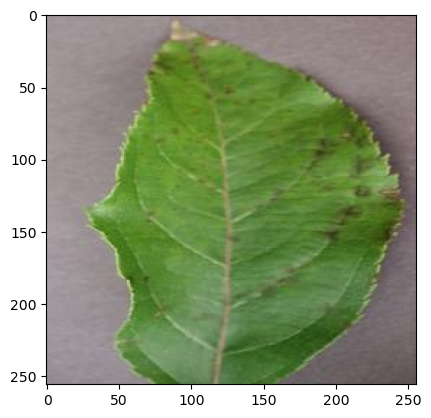

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

152
(256, 256)


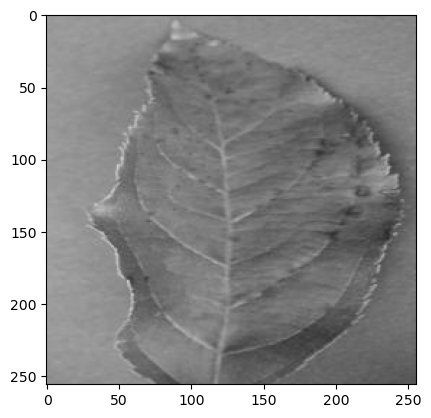

In [7]:
# if read in as gray scale
img0 = cv2.imread(os.path.join(test_dir, file_list[-1]), cv2.IMREAD_GRAYSCALE)
print(img0[0][0])
print(img0.shape)
plt.imshow(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB))
plt.show()

[152 148 160]
(128, 128, 3)


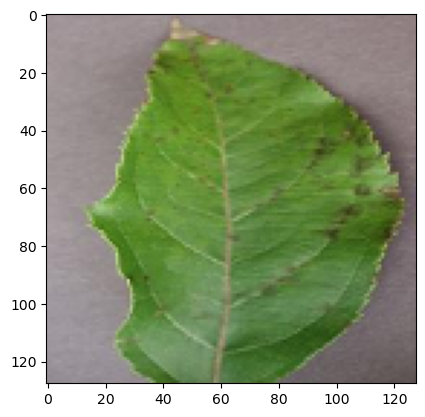

In [8]:
# resize the image to smaller matrix
img1 = cv2.resize(img, dsize = (128, 128), interpolation = cv2.INTER_CUBIC)
print(img1[0][0])
print(img1.shape)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

[183 178 192]
(128, 128, 3)


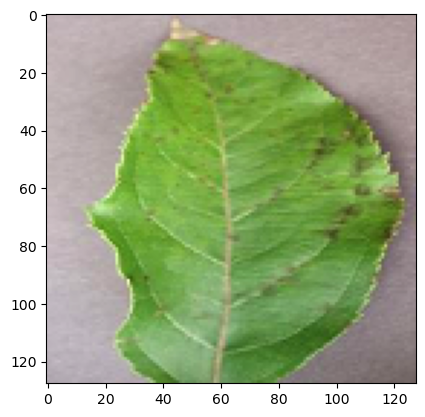

In [9]:
# change the brightness and contrast
alpha = 1.2
beta = 0.5
img2 = cv2.addWeighted(img1, alpha, np.zeros(img1.shape, img.dtype), 0, beta)
print(img2[0][0])
print(img2.shape)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

183
(128, 128)


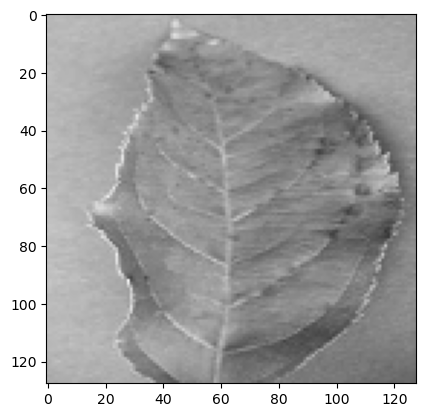

In [11]:
img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
print(img3[0][0])
print(img3.shape)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

255
(128, 128)


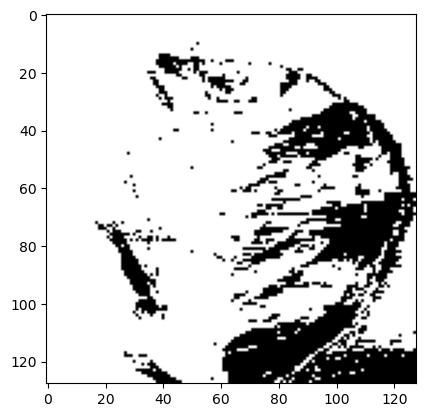

In [38]:
(thresh, img3bw) = cv2.threshold(img3, 125, 255, cv2.THRESH_BINARY)
print(img3bw[0][0])
print(img3bw.shape)
plt.imshow(cv2.cvtColor(img3bw, cv2.COLOR_BGR2RGB))
plt.show()

0.7176470588235294
0.9647058823529412
0.21176470588235294
(128, 128)


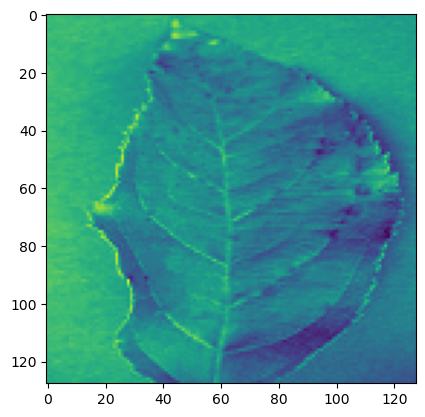

In [44]:
img3s = img3 / 255
print(img3s[0][0])
print(img3s.max())
print(img3s.min())
print(img3s.shape)
plt.imshow(img3s)
plt.show()

[72 77 63]
(128, 128, 3)


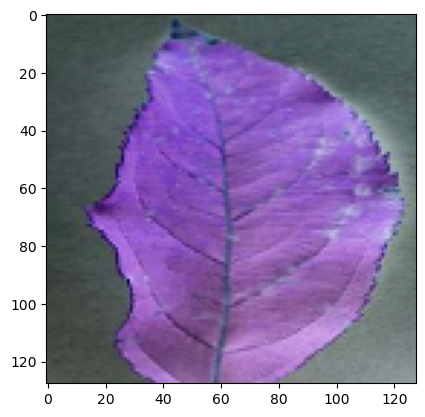

In [46]:
# curve out the edges
img4 = cv2.bitwise_not(img2)
print(img4[0][0])
print(img4.shape)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.show()

[0.28235294 0.30196078 0.24705882]
(128, 128, 3)


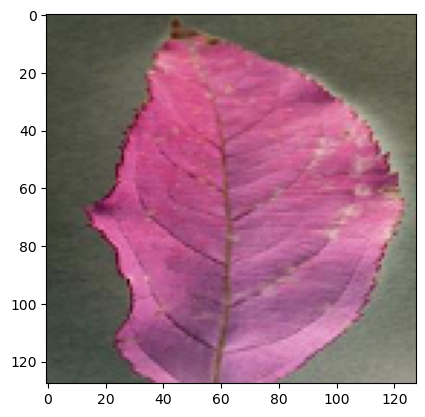

In [47]:
img4s = img4 / 255
print(img4s[0][0])
print(img4s.shape)
plt.imshow(img4s)
plt.show()

In [252]:
print(img[0][0])
print(img.shape)

[152 148 160]
(256, 256, 3)


In [253]:
print(img0[0][0])
print(img0.shape)

152
(256, 256)


In [254]:
print(img1[0][0])
print(img1.shape)

[152 148 160]
(128, 128, 3)


In [255]:
print(img2[0][0])
print(img2.shape)

[183 178 192]
(128, 128, 3)


In [256]:
print(img3[0][0])
print(img3.shape)

183
(128, 128)


In [257]:
print(img4[0][0])
print(img4.shape)

[72 77 63]
(128, 128, 3)


## 2.2. Try to find the proper approach to determine if the key structures in the original images are kept or not after pre-processing

### 2.2.1. cv2 histogram comparison

In [258]:
g_bins = 256
b_bins = 256
r_bins = 256
histSize = [g_bins, b_bins, r_bins]
# hue varies from 0 to 179, saturation from 0 to 255
g_ranges = [0, 256]
b_ranges = [0, 256]
r_ranges = [0, 256]
ranges = g_ranges + b_ranges + r_ranges # concat lists
# Use the 0-th and 1-st channels
channels = [0, 1, 2]
ranges

[0, 256, 0, 256, 0, 256]

In [259]:
hist_img = cv2.calcHist([img], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_img, hist_img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [260]:
img[0][0]

array([152, 148, 160], dtype=uint8)

In [261]:
hist_img1 = cv2.calcHist([img1], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [262]:
hist_img2 = cv2.calcHist([img2], channels, None, histSize, ranges, accumulate=False)
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [263]:
score = cv2.compareHist(hist_img, hist_img, 0)
score

1.0

In [264]:
score = cv2.compareHist(hist_img, hist_img1, 0)
score

0.9359100459660435

In [265]:
score = cv2.compareHist(hist_img, hist_img2, 0)
score

-0.020975802932870467

**Brightness and contrast change has a large impact on cv2.compareHist results.**

### 2.2.2. array determinant

In [266]:
def detcolor(img):
    bgr_img = cv2.split(img)
    b_img = bgr_img[0]
    print(f'b component is: {b_img}.')
    print(f'b component shape is: {b_img.shape}.')
    g_img = bgr_img[1]
    print(f'g component is: {g_img}.')
    print(f'g component shape is: {g_img.shape}.')
    r_img = bgr_img[2]
    print(f'r component is: {r_img}.')
    print(f'r component shape is: {r_img.shape}.')
    b_det = np.linalg.det(b_img)
    print(f'b component determinant is: {b_det}.')
    g_det = np.linalg.det(g_img)
    print(f'g component determinant is: {g_det}.')
    r_det = np.linalg.det(r_img)
    print(f'r component determinant is: {r_det}.')

In [267]:
detcolor(img)

b component is: [[152 153 153 ... 130 127 125]
 [152 152 152 ... 126 124 123]
 [154 153 152 ... 126 127 127]
 ...
 [151 150 148 ...  83  81  81]
 [148 147 147 ...  82  81  80]
 [144 144 145 ...  82  81  80]].
b component shape is: (256, 256).
g component is: [[148 149 149 ... 129 126 124]
 [148 148 148 ... 125 123 122]
 [150 149 148 ... 125 126 126]
 ...
 [144 143 141 ...  84  82  82]
 [141 140 140 ...  83  82  81]
 [137 137 138 ...  83  82  81]].
g component shape is: (256, 256).
r component is: [[160 161 161 ... 145 142 140]
 [160 160 160 ... 141 139 138]
 [162 161 160 ... 141 142 142]
 ...
 [151 150 148 ...  94  92  92]
 [148 147 147 ...  93  92  91]
 [144 144 145 ...  93  92  91]].
r component shape is: (256, 256).
b component determinant is: -inf.
g component determinant is: inf.
r component determinant is: -inf.


In [268]:
detcolor(img1)

b component is: [[152 153 153 ... 130 129 124]
 [155 151 151 ... 128 128 130]
 [156 153 153 ... 129 130 128]
 ...
 [145 143 146 ...  85  85  83]
 [151 146 146 ...  85  84  81]
 [145 146 146 ...  85  82  80]].
b component shape is: (128, 128).
g component is: [[148 149 149 ... 129 128 123]
 [151 147 147 ... 127 127 129]
 [152 149 149 ... 128 129 127]
 ...
 [138 136 139 ...  86  86  84]
 [144 139 139 ...  86  85  82]
 [138 139 139 ...  86  83  81]].
g component shape is: (128, 128).
r component is: [[160 161 161 ... 145 144 139]
 [163 159 159 ... 143 143 145]
 [164 161 161 ... 144 145 143]
 ...
 [145 143 146 ...  96  96  94]
 [151 146 146 ...  96  95  92]
 [145 146 146 ...  96  93  91]].
r component shape is: (128, 128).
b component determinant is: 6.551317095557529e+213.
g component determinant is: -5.098884660699853e+209.
r component determinant is: -1.5592358999167927e+211.


In [269]:
detcolor(img2)

b component is: [[183 184 184 ... 156 155 149]
 [186 182 182 ... 154 154 156]
 [188 184 184 ... 155 156 154]
 ...
 [174 172 176 ... 103 103 100]
 [182 176 176 ... 103 101  98]
 [174 176 176 ... 103  99  96]].
b component shape is: (128, 128).
g component is: [[178 179 179 ... 155 154 148]
 [182 177 177 ... 153 153 155]
 [183 179 179 ... 154 155 153]
 ...
 [166 164 167 ... 104 104 101]
 [173 167 167 ... 104 103  99]
 [166 167 167 ... 104 100  98]].
g component shape is: (128, 128).
r component is: [[192 194 194 ... 174 173 167]
 [196 191 191 ... 172 172 174]
 [197 194 194 ... 173 174 172]
 ...
 [174 172 176 ... 116 116 113]
 [182 176 176 ... 116 115 111]
 [174 176 176 ... 116 112 110]].
r component shape is: (128, 128).
b component determinant is: 2.6583290634413564e+224.
g component determinant is: -1.0110890777259616e+220.
r component determinant is: 7.333451901319493e+220.


In [270]:
detcolor(img4)

b component is: [[ 72  71  71 ...  99 100 106]
 [ 69  73  73 ... 101 101  99]
 [ 67  71  71 ... 100  99 101]
 ...
 [ 81  83  79 ... 152 152 155]
 [ 73  79  79 ... 152 154 157]
 [ 81  79  79 ... 152 156 159]].
b component shape is: (128, 128).
g component is: [[ 77  76  76 ... 100 101 107]
 [ 73  78  78 ... 102 102 100]
 [ 72  76  76 ... 101 100 102]
 ...
 [ 89  91  88 ... 151 151 154]
 [ 82  88  88 ... 151 152 156]
 [ 89  88  88 ... 151 155 157]].
g component shape is: (128, 128).
r component is: [[ 63  61  61 ...  81  82  88]
 [ 59  64  64 ...  83  83  81]
 [ 58  61  61 ...  82  81  83]
 ...
 [ 81  83  79 ... 139 139 142]
 [ 73  79  79 ... 139 140 144]
 [ 81  79  79 ... 139 143 145]].
r component shape is: (128, 128).
b component determinant is: -1.0881602990386968e+224.
g component determinant is: 3.244830792613113e+219.
r component determinant is: -3.598943689959992e+220.


**The calculated determinants depend on data scales. Normalization is tried next.**

In [271]:
def detcolor(img, color = True, norm = True):
    bgr_img = cv2.split(img)
    if color == True and norm == False:
        b_img = bgr_img[0]
        print(f'b component is: {b_img}.')
        print(f'b component shape is: {b_img.shape}.')
        g_img = bgr_img[1]
        print(f'g component is: {g_img}.')
        print(f'g component shape is: {g_img.shape}.')
        r_img = bgr_img[2]
        print(f'r component is: {r_img}.')
        print(f'r component shape is: {r_img.shape}.')
        b_det = np.linalg.det(b_img)
        print(f'b component determinant is: {b_det}.')
        g_det = np.linalg.det(g_img)
        print(f'g component determinant is: {g_det}.')
        r_det = np.linalg.det(r_img)
        print(f'r component determinant is: {r_det}.')
    elif color == True and norm == True:
        b_img = bgr_img[0]
        b_min = np.min(b_img)
        b_max = np.max(b_img)
        b_img = (b_img - b_min) / (b_max - b_min)
        print(f'b component is: {b_img}.')
        print(f'b component shape is: {b_img.shape}.')
        g_img = bgr_img[1]
        g_min = np.min(g_img)
        g_max = np.max(g_img)
        g_img = (g_img - g_min) / (g_max - g_min)
        print(f'g component is: {g_img}.')
        print(f'g component shape is: {g_img.shape}.')
        r_img = bgr_img[2]
        r_min = np.min(r_img)
        r_max = np.max(r_img)
        r_img = (r_img - r_min) / (r_max - r_min)
        print(f'r component is: {r_img}.')
        print(f'r component shape is: {r_img.shape}.')
        b_det = np.linalg.det(b_img)
        print(f'b component determinant is: {b_det}.')
        g_det = np.linalg.det(g_img)
        print(f'g component determinant is: {g_det}.')
        r_det = np.linalg.det(r_img)
        print(f'r component determinant is: {r_det}.')
    elif color == False and norm == False:
        b_img = bgr_img[0]
        print(f'gray component is: {b_img}.')
        print(f'gray component shape is: {b_img.shape}.')
        b_det = np.linalg.det(b_img)
        print(f'gray component determinant is: {b_det}.')
    elif color == False and norm == True:
        b_img = bgr_img[0]
        b_min = np.min(b_img)
        b_max = np.max(b_img)
        b_img = (b_img - b_min) / (b_max - b_min)
        print(f'gray component is: {b_img}.')
        print(f'gray component shape is: {b_img.shape}.')
        b_det = np.linalg.det(b_img)
        print(f'gray component determinant is: {b_det}.')

In [272]:
detcolor(img)

b component is: [[0.89411765 0.9        0.9        ... 0.76470588 0.74705882 0.73529412]
 [0.89411765 0.89411765 0.89411765 ... 0.74117647 0.72941176 0.72352941]
 [0.90588235 0.9        0.89411765 ... 0.74117647 0.74705882 0.74705882]
 ...
 [0.88823529 0.88235294 0.87058824 ... 0.48823529 0.47647059 0.47647059]
 [0.87058824 0.86470588 0.86470588 ... 0.48235294 0.47647059 0.47058824]
 [0.84705882 0.84705882 0.85294118 ... 0.48235294 0.47647059 0.47058824]].
b component shape is: (256, 256).
g component is: [[0.57303371 0.57865169 0.57865169 ... 0.46629213 0.4494382  0.43820225]
 [0.57303371 0.57303371 0.57303371 ... 0.44382022 0.43258427 0.42696629]
 [0.58426966 0.57865169 0.57303371 ... 0.44382022 0.4494382  0.4494382 ]
 ...
 [0.5505618  0.54494382 0.53370787 ... 0.21348315 0.20224719 0.20224719]
 [0.53370787 0.52808989 0.52808989 ... 0.20786517 0.20224719 0.19662921]
 [0.51123596 0.51123596 0.51685393 ... 0.20786517 0.20224719 0.19662921]].
g component shape is: (256, 256).
r componen

In [278]:
detcolor(img1)

b component is: [[0.90853659 0.91463415 0.91463415 ... 0.77439024 0.76829268 0.73780488]
 [0.92682927 0.90243902 0.90243902 ... 0.76219512 0.76219512 0.77439024]
 [0.93292683 0.91463415 0.91463415 ... 0.76829268 0.77439024 0.76219512]
 ...
 [0.86585366 0.85365854 0.87195122 ... 0.5        0.5        0.48780488]
 [0.90243902 0.87195122 0.87195122 ... 0.5        0.49390244 0.47560976]
 [0.86585366 0.87195122 0.87195122 ... 0.5        0.48170732 0.4695122 ]].
b component shape is: (128, 128).
g component is: [[0.5755814  0.58139535 0.58139535 ... 0.46511628 0.45930233 0.43023256]
 [0.59302326 0.56976744 0.56976744 ... 0.45348837 0.45348837 0.46511628]
 [0.59883721 0.58139535 0.58139535 ... 0.45930233 0.46511628 0.45348837]
 ...
 [0.51744186 0.50581395 0.52325581 ... 0.21511628 0.21511628 0.20348837]
 [0.55232558 0.52325581 0.52325581 ... 0.21511628 0.20930233 0.19186047]
 [0.51744186 0.52325581 0.52325581 ... 0.21511628 0.19767442 0.18604651]].
g component shape is: (128, 128).
r componen

In [273]:
detcolor(img2)

b component is: [[0.90862944 0.91370558 0.91370558 ... 0.7715736  0.76649746 0.73604061]
 [0.92385787 0.9035533  0.9035533  ... 0.76142132 0.76142132 0.7715736 ]
 [0.93401015 0.91370558 0.91370558 ... 0.76649746 0.7715736  0.76142132]
 ...
 [0.86294416 0.85279188 0.87309645 ... 0.50253807 0.50253807 0.48730964]
 [0.9035533  0.87309645 0.87309645 ... 0.50253807 0.49238579 0.47715736]
 [0.86294416 0.87309645 0.87309645 ... 0.50253807 0.4822335  0.46700508]].
b component shape is: (128, 128).
g component is: [[0.60714286 0.6122449  0.6122449  ... 0.48979592 0.48469388 0.45408163]
 [0.62755102 0.60204082 0.60204082 ... 0.47959184 0.47959184 0.48979592]
 [0.63265306 0.6122449  0.6122449  ... 0.48469388 0.48979592 0.47959184]
 ...
 [0.54591837 0.53571429 0.55102041 ... 0.22959184 0.22959184 0.21428571]
 [0.58163265 0.55102041 0.55102041 ... 0.22959184 0.2244898  0.20408163]
 [0.54591837 0.55102041 0.55102041 ... 0.22959184 0.20918367 0.19897959]].
g component shape is: (128, 128).
r componen

In [274]:
detcolor(img4)

b component is: [[0.09137056 0.08629442 0.08629442 ... 0.2284264  0.23350254 0.26395939]
 [0.07614213 0.0964467  0.0964467  ... 0.23857868 0.23857868 0.2284264 ]
 [0.06598985 0.08629442 0.08629442 ... 0.23350254 0.2284264  0.23857868]
 ...
 [0.13705584 0.14720812 0.12690355 ... 0.49746193 0.49746193 0.51269036]
 [0.0964467  0.12690355 0.12690355 ... 0.49746193 0.50761421 0.52284264]
 [0.13705584 0.12690355 0.12690355 ... 0.49746193 0.5177665  0.53299492]].
b component shape is: (128, 128).
g component is: [[0.39285714 0.3877551  0.3877551  ... 0.51020408 0.51530612 0.54591837]
 [0.37244898 0.39795918 0.39795918 ... 0.52040816 0.52040816 0.51020408]
 [0.36734694 0.3877551  0.3877551  ... 0.51530612 0.51020408 0.52040816]
 ...
 [0.45408163 0.46428571 0.44897959 ... 0.77040816 0.77040816 0.78571429]
 [0.41836735 0.44897959 0.44897959 ... 0.77040816 0.7755102  0.79591837]
 [0.45408163 0.44897959 0.44897959 ... 0.77040816 0.79081633 0.80102041]].
g component shape is: (128, 128).
r componen

In [277]:
detcolor(img4s)

b component is: [[0.09137056 0.08629442 0.08629442 ... 0.2284264  0.23350254 0.26395939]
 [0.07614213 0.0964467  0.0964467  ... 0.23857868 0.23857868 0.2284264 ]
 [0.06598985 0.08629442 0.08629442 ... 0.23350254 0.2284264  0.23857868]
 ...
 [0.13705584 0.14720812 0.12690355 ... 0.49746193 0.49746193 0.51269036]
 [0.0964467  0.12690355 0.12690355 ... 0.49746193 0.50761421 0.52284264]
 [0.13705584 0.12690355 0.12690355 ... 0.49746193 0.5177665  0.53299492]].
b component shape is: (128, 128).
g component is: [[0.39285714 0.3877551  0.3877551  ... 0.51020408 0.51530612 0.54591837]
 [0.37244898 0.39795918 0.39795918 ... 0.52040816 0.52040816 0.51020408]
 [0.36734694 0.3877551  0.3877551  ... 0.51530612 0.51020408 0.52040816]
 ...
 [0.45408163 0.46428571 0.44897959 ... 0.77040816 0.77040816 0.78571429]
 [0.41836735 0.44897959 0.44897959 ... 0.77040816 0.7755102  0.79591837]
 [0.45408163 0.44897959 0.44897959 ... 0.77040816 0.79081633 0.80102041]].
g component shape is: (128, 128).
r componen

In [275]:
detcolor(img3, color = False)

gray component is: [[0.671875   0.67708333 0.67708333 ... 0.55729167 0.55208333 0.52083333]
 [0.69270833 0.66666667 0.66666667 ... 0.546875   0.546875   0.55729167]
 [0.69791667 0.67708333 0.67708333 ... 0.55208333 0.55729167 0.546875  ]
 ...
 [0.59895833 0.58854167 0.609375   ... 0.27604167 0.27604167 0.26041667]
 [0.640625   0.609375   0.609375   ... 0.27604167 0.27083333 0.25      ]
 [0.59895833 0.609375   0.609375   ... 0.27604167 0.25520833 0.24479167]].
gray component shape is: (128, 128).
gray component determinant is: -4.159477732084706e-73.


In [276]:
detcolor(img0, color = False)

gray component is: [[0.66863905 0.67455621 0.67455621 ... 0.56213018 0.5443787  0.53254438]
 [0.66863905 0.66863905 0.66863905 ... 0.53846154 0.52662722 0.52071006]
 [0.68047337 0.67455621 0.66863905 ... 0.53846154 0.5443787  0.5443787 ]
 ...
 [0.63905325 0.63313609 0.62130178 ... 0.28402367 0.27218935 0.27218935]
 [0.62130178 0.61538462 0.61538462 ... 0.27810651 0.27218935 0.26627219]
 [0.59763314 0.59763314 0.6035503  ... 0.27810651 0.27218935 0.26627219]].
gray component shape is: (256, 256).
gray component determinant is: -7.17941341530362e-250.


**Using determinant is not straitforward to tell if the kep structures are kept or not. Even with normalization, determinants values vary a lot before and after pre-processing.**

### 2.2.3. skimage structural similarity index

In [49]:
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [50]:
def structureqc(imgb4, imgaf, color = True):
    if color == True:
        bgr_imgb4 = cv2.split(imgb4)
        size = bgr_imgb4[0].shape
        up_imgaf = cv2.resize(imgaf, size)
        bgr_imgaf = cv2.split(up_imgaf)
        for i in range(3):
            b_imgb4 = bgr_imgb4[i]
            b_imgaf = bgr_imgaf[i]
            mse = mean_squared_error(b_imgb4, b_imgaf)
            ssim_val = ssim(b_imgb4, b_imgaf)
            print(f'For channel {i}: MSE is {mse} and SSIM is {ssim_val}')
    else:
        size = imgb4.shape
        up_imgaf = cv2.resize(imgaf, size)
        mse = mean_squared_error(imgb4, up_imgaf)
        ssim_val = ssim(imgb4, up_imgaf)
        print(f'For gray scale: MSE is {mse} and SSIM is {ssim_val}')

In [51]:
# check mse and ssim for no processing
structureqc(img, img)

For channel 0: MSE is 0.0 and SSIM is 1.0
For channel 1: MSE is 0.0 and SSIM is 1.0
For channel 2: MSE is 0.0 and SSIM is 1.0


In [52]:
# check mse and ssim for after resizing
structureqc(img, img1)

For channel 0: MSE is 11.51263427734375 and SSIM is 0.9500627128432705
For channel 1: MSE is 11.358688354492188 and SSIM is 0.946666373192666
For channel 2: MSE is 11.44622802734375 and SSIM is 0.9475532071014829


In [53]:
# check mse and ssim for after resizing + brightness adjustment
structureqc(img, img2)

For channel 0: MSE is 421.73020935058594 and SSIM is 0.9391023198654458
For channel 1: MSE is 744.8132629394531 and SSIM is 0.9377960771695795
For channel 2: MSE is 601.7243194580078 and SSIM is 0.9377047963498519


In [54]:
# check mse and ssim for after resizing + brightness adjustment + bitwise_not
structureqc(img, img4)

For channel 0: MSE is 11737.906143188477 and SSIM is 0.06158170231698445
For channel 1: MSE is 3090.429916381836 and SSIM is 0.09041886596077782
For channel 2: MSE is 4392.283447265625 and SSIM is 0.056136503759469554


In [55]:
structureqc(img, img4s)

For channel 0: MSE is 9951.278030981139 and SSIM is 0.011689940498716604
For channel 1: MSE is 17859.40455698801 and SSIM is 0.003914100697919671
For channel 2: MSE is 14299.722658763556 and SSIM is 0.005627441687369769


C:\Users\wfei2\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [56]:
# check mse and ssim for raw gray scale and gray scale after resizing + brightness adjustment + bitwise_not
structureqc(img0, img3, color = False)

For gray scale: MSE is 649.1456756591797 and SSIM is 0.9369677376195114


In [60]:
structureqc(img0, img3s*255, color = False)

For gray scale: MSE is 651.950784444809 and SSIM is 0.9376891584092176


In [61]:
structureqc(img0, img3bw, color = False)

For gray scale: MSE is 12440.889114379883 and SSIM is 0.4156190691981613


In [62]:
# try to compare the original color image with gray scale image after preprocessing
bgr_img = cv2.split(img)
b_img = bgr_img[0]
g_img = bgr_img[1]
r_img = bgr_img[2]
up_img3 = cv2.resize(img3, (256, 256))
print(mean_squared_error(b_img, up_img3))
print(mean_squared_error(g_img, up_img3))
print(mean_squared_error(r_img, up_img3))
print(ssim(b_img, up_img3))
print(ssim(g_img, up_img3))
print(ssim(r_img, up_img3))

3948.1416015625
444.66859436035156
1158.4527587890625
0.7277423184933939
0.9276049656234152
0.891184667164642


## 2.3. Conclusion
* Resize, brightness adjustment, gray scale color and scaling should help speed up the modeling process without losing key features in the images.
* Changing images to black and white will lose key features in the images.
* SSIM looks promising to tell if the structures are changed or not after processing.
* However a threshhold is needed to tell how much decrease in ssim is acceptable.
* How to compare color images to gray scale images? take the average?